In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense, Dropout
from scipy.stats import uniform
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import f1_score
from sklearn.svm import SVC
from xgboost import XGBClassifier

2024-04-18 15:18:20.063148: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-18 15:18:20.063230: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-18 15:18:20.064917: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
train = pd.read_csv(r'/kaggle/input/ml-olympiad-predicting-earthquake-damage/train.csv')
test = pd.read_csv(r'/kaggle/input/ml-olympiad-predicting-earthquake-damage/test.csv')

In [3]:
le = LabelEncoder()

In [4]:
obj_cols = train.select_dtypes(include='object').columns.tolist()

In [5]:
for col in obj_cols:
    train[col] = le.fit_transform(train[col])
    test[col] = le.transform(test[col])

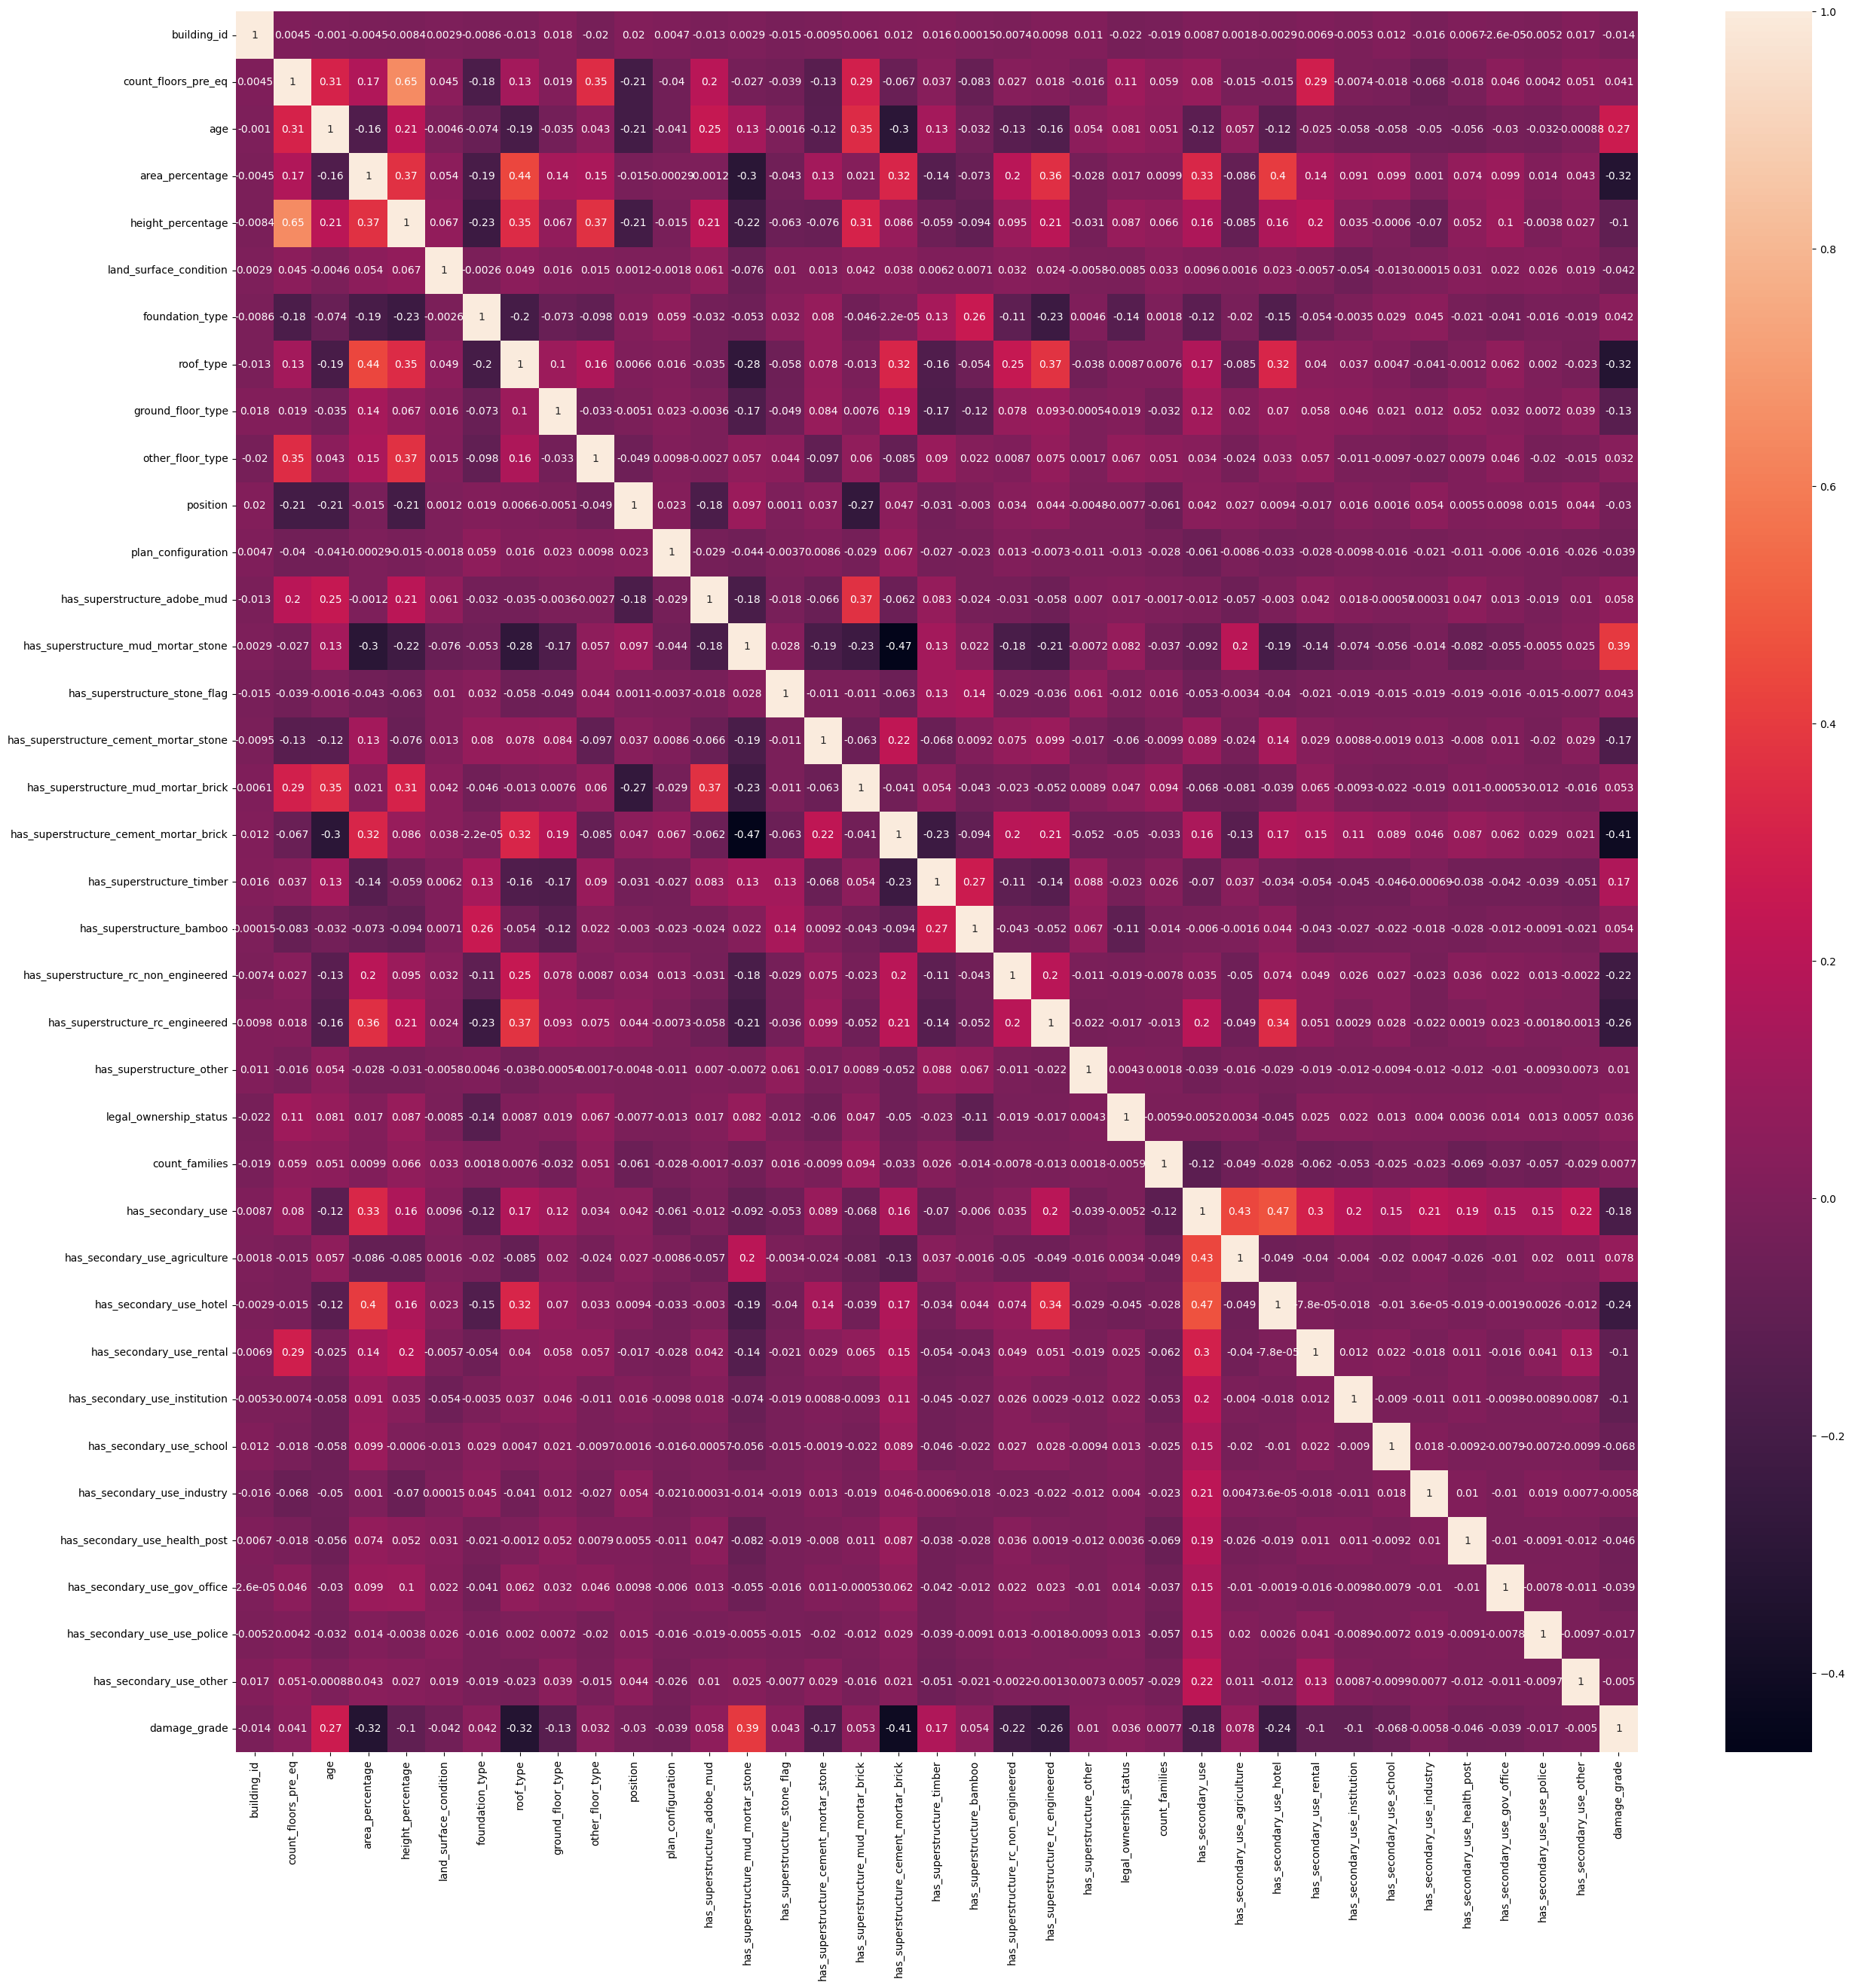

In [6]:
plt.figure(figsize=(30,30))
sns.heatmap(train.corr(),annot=True)
plt.show()

In [7]:
THRESHOLD = 0.11

correlation = train.corr()
high_corr_cols = correlation['damage_grade'][abs(correlation['damage_grade']) > THRESHOLD].index.tolist()
high_corr_cols.remove('damage_grade')

high_corr_cols = ['area_percentage','roof_type','has_superstructure_cement_mortar_brick','has_superstructure_rc_non_engineered','has_superstructure_rc_engineered','has_secondary_use_hotel','has_secondary_use','has_superstructure_mud_mortar_stone','age']

In [8]:
X = train[high_corr_cols]
y = train['damage_grade']

#y = y - 1

In [9]:
len(X.columns)

9

In [10]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

You can choose your model and your config below. If you are using XGBoost, add `y = y + 1`. If you are using neural networks, add `y = y + 1` and `np.argmax(predictions, axis=1)`

In [11]:
"""
model = XGBClassifier()

param_dist = {'n_jobs': [-1],
            'n_estimators': np.arange(100, 1000, 100),
            'max_depth': np.arange(10, 100, 15),
            'learning_rate': [0.03, 0.01, 0.1]
           }

randomized_search = RandomizedSearchCV(model, 
                        param_distributions=param_dist,
                        cv=2,
                        scoring='f1_macro',
                        verbose=2)

randomized_search.fit(X_train, y_train)
model = randomized_search.best_estimator_
"""

"\nmodel = XGBClassifier()\n\nparam_dist = {'n_jobs': [-1],\n            'n_estimators': np.arange(100, 1000, 100),\n            'max_depth': np.arange(10, 100, 15),\n            'learning_rate': [0.03, 0.01, 0.1]\n           }\n\nrandomized_search = RandomizedSearchCV(model, \n                        param_distributions=param_dist,\n                        cv=2,\n                        scoring='f1_macro',\n                        verbose=2)\n\nrandomized_search.fit(X_train, y_train)\nmodel = randomized_search.best_estimator_\n"

In [ ]:
#"""
model = SVC(random_state=42)

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100], 
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

grid_search = GridSearchCV(
    estimator=model, 
    param_grid=param_grid, 
    cv=2, 
    scoring='f1_macro', 
    verbose=2)

grid_search.fit(X_train, y_train)
model = grid_search.best_estimator_
#"""

Fitting 2 folds for each of 36 candidates, totalling 72 fits
[CV] END ................C=0.001, gamma=scale, kernel=linear; total time=   0.2s
[CV] END ................C=0.001, gamma=scale, kernel=linear; total time=   0.2s
[CV] END ...................C=0.001, gamma=scale, kernel=rbf; total time=   0.3s
[CV] END ...................C=0.001, gamma=scale, kernel=rbf; total time=   0.2s
[CV] END ..................C=0.001, gamma=scale, kernel=poly; total time=   0.2s
[CV] END ..................C=0.001, gamma=scale, kernel=poly; total time=   0.2s
[CV] END .................C=0.001, gamma=auto, kernel=linear; total time=   0.2s
[CV] END .................C=0.001, gamma=auto, kernel=linear; total time=   0.2s
[CV] END ....................C=0.001, gamma=auto, kernel=rbf; total time=   0.3s
[CV] END ....................C=0.001, gamma=auto, kernel=rbf; total time=   0.3s
[CV] END ...................C=0.001, gamma=auto, kernel=poly; total time=  50.6s
[CV] END ...................C=0.001, gamma=auto,

In [ ]:
"""
model = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_search = GridSearchCV(
    estimator=model, 
    param_grid=param_grid, 
    cv=3, 
    scoring='f1_macro', 
    verbose=1)

grid_search.fit(X_train, y_train)
model = grid_search.best_estimator_
"""

In [ ]:
"""
model = LogisticRegression(
    max_iter=1000, 
    random_state=42
)

param_dist = {
    'C': uniform(0.001, 1000),
    #'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga', 'lbfgs']
}

random_search = RandomizedSearchCV(
    estimator=model, 
    param_distributions=param_dist, 
    n_iter=10,
    cv=3, 
    scoring='f1_macro', 
    random_state=42,
    verbose=1
)

random_search.fit(X_train, y_train)
model = random_search.best_estimator_
model.fit(X_train, y_train)
"""

In [ ]:
"""
model = LogisticRegression(
    max_iter=1000, 
    random_state=42
)

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100], 
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga', 'lbfgs']
}

grid_search = GridSearchCV(
    estimator=model, 
    param_grid=param_grid, 
    cv=3, 
    scoring='f1_macro', 
    verbose=1)

grid_search.fit(X_train, y_train)
model = grid_search.best_estimator_
model.fit(X_train, y_train)
"""

In [ ]:
"""
model = xgboost.XGBClassifier(
    objective='multi:softmax', 
    num_class=3, 
    random_state=42)

param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

grid_search = GridSearchCV(
    estimator=model, 
    param_grid=param_grid, 
    cv=3, 
    scoring='f1_macro', 
    verbose=1)

grid_search.fit(X_train, y_train)
model = grid_search.best_estimator_
"""

In [ ]:
"""
model = Sequential()

model.add(Dense(units=32, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.3))
model.add(Dense(units=16, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=8, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=3, activation='softmax'))

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model.fit(X_train, 
          y_train, 
          epochs=20, 
          batch_size=64, 
          validation_data=(X_val, y_val))
"""

In [ ]:
#model = LogisticRegression(random_state=42)
#model.fit(X_train, y_train)

In [ ]:
predictions = model.predict(X_val)
#predictions = np.argmax(predictions, axis=1)
predictions = predictions.astype(int)
predictions

In [ ]:
f1_score(y_val, predictions, average='macro')

In [ ]:
submission_pred = model.predict(test[high_corr_cols])
#submission_pred = np.argmax(submission_pred, axis=1)
#submission_pred = submission_pred + 1
submission_pred = submission_pred.astype(int)
submission_pred

In [ ]:
df = pd.DataFrame(
    {
        'building_id': test['building_id'],
        'damage_grade': submission_pred
    }
)

df['damage_grade'] = df['damage_grade'].astype(int)

In [ ]:
file_name = "submission.csv"

file_path = "/kaggle/working/" + file_name

if os.path.exists(file_path):
    os.remove(file_path)
    print("Removed!")
else:
    print("Error: file not found!")

In [ ]:
df.to_csv("submission.csv", index=False)